# Problem Set #2
Preston Mui

## Calorie Demand

In [1]:
# Preparation to use the dataset
using DataFrames, Gadfly
data = readtable("RPS_calorie_data.out");

### 2
**Using the power series basis, construct a new basis that is orthogonal to the design points ($K = 12$)**

In [43]:
# Extract the matrices from the data
K = 12
Y = convert(Array,data[:Y0tc])
X = zeros(size(data)[1],K)

# Construct the basis vectors
for k = 1:K
    X[:,k] = data[:X0te].^(k-1)
end

# Gram-Schmidt Orthogonalization
W = zeros(size(X))
for k = 1:K
    W[:,k] = X[:,k]
    for i = 1:k-1
        W[:,k] = W[:,k] - (dot(X[:,k],W[:,i]) / dot(W[:,i],W[:,i])) * W[i]
    end
end
# Orthonormalization
for k = 1:K
    W[:,k] = W[:,k] / norm(W[:,k])
end

**Let $W_i$ denote the $K \times 1$ vector of orthonormal basis functions for household $i$. Compute the Least Squares Fit:**

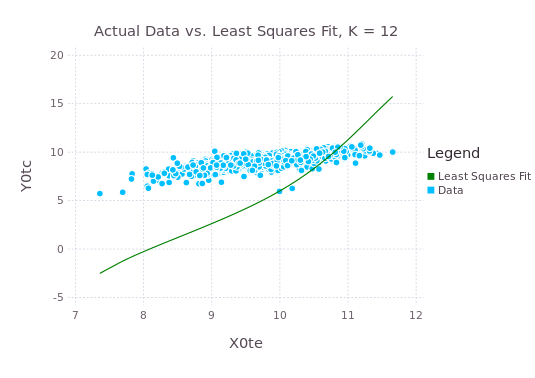

In [44]:
theta = inv(W'*W) * W' * Y
m = W * theta
plot(layer(x=X[:,2], y=m, Geom.line,Theme(default_color=colorant"green")),
        layer(x=X[:,2], y=Y, Geom.point),
        Guide.XLabel("X0te"),
        Guide.YLabel("Y0tc"),
        Guide.Title("Actual Data vs. Least Squares Fit, K = 12"),
        Guide.manual_color_key("Legend",["Least Squares Fit","Data"],["green","deepskyblue"]))

### 3.

**Using the shrinkage estimator, estimate $m(X_i)$. Plot this on the unsmoothed data.**